# **AI Applications Project: New Orleans Airbnb Market Analysis**

## Project Overview
This notebook contains the exploratory data analysis (EDA) for our Airbnb market analysis project focusing on New Orleans. We will analyze listings, calendar, and reviews data to gain insights into the local short-term rental market and prepare for predictive modeling.

## Data Sources
- **Listings Data**: Property information including location, amenities, and pricing
- **Calendar Data**: Daily availability and pricing information  
- **Reviews Data**: Guest feedback and ratings for sentiment analysis

*Data sourced from Inside Airbnb (September 2025 snapshot)*

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import re

# Machine learning libraries for future use
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings for better output formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
# Data acquisition from Inside Airbnb
# New Orleans selected due to its unique tourism patterns, cultural significance, 
# and diverse neighborhood characteristics that provide rich analytical opportunities

print("Loading New Orleans Airbnb datasets...")

# Define URLs for the three main datasets
listings_url = 'https://data.insideairbnb.com/united-states/la/new-orleans/2025-09-11/data/listings.csv.gz'
calendar_url = 'https://data.insideairbnb.com/united-states/la/new-orleans/2025-09-11/data/calendar.csv.gz'
reviews_url = 'https://data.insideairbnb.com/united-states/la/new-orleans/2025-09-11/data/reviews.csv.gz'

# Load the datasets into DataFrames with compression handling
listings_df = pd.read_csv(listings_url, compression='gzip')
calendar_df = pd.read_csv(calendar_url, compression='gzip')
reviews_df = pd.read_csv(reviews_url, compression='gzip')

print(f"✓ Listings dataset loaded: {listings_df.shape[0]:,} records, {listings_df.shape[1]} columns")
print(f"✓ Calendar dataset loaded: {calendar_df.shape[0]:,} records, {calendar_df.shape[1]} columns")
print(f"✓ Reviews dataset loaded: {reviews_df.shape[0]:,} records, {reviews_df.shape[1]} columns")

Loading New Orleans Airbnb datasets...
✓ Listings dataset loaded: 7,444 records, 79 columns
✓ Calendar dataset loaded: 2,717,060 records, 7 columns
✓ Reviews dataset loaded: 489,253 records, 6 columns
✓ Listings dataset loaded: 7,444 records, 79 columns
✓ Calendar dataset loaded: 2,717,060 records, 7 columns
✓ Reviews dataset loaded: 489,253 records, 6 columns


In [3]:
# Display first 5 rows of listings data to understand property features
# Listings data contains property details, pricing, location, and host information
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19091,https://www.airbnb.com/rooms/19091,20250911031349,2025-09-11,city scrape,Fully Furnished Cozy Apartment,This cozy space is a wonder of post-Katrina re...,"NorthWest Carrollton, where this apartment is ...",https://a0.muscache.com/pictures/a5fdfd3b-5d81...,72880,https://www.airbnb.com/users/show/72880,John,2010-01-23,"New Orleans, LA",I recently (2018) retired as the Director of B...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/72880/profile...,https://a0.muscache.com/im/users/72880/profile...,Riverbend,1.0,1.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Leonidas,NaN,29.96100,-90.11950,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water kettle"", ""Air conditioning"", ""Dish...",$61.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,23,34,61,331,2025-09-11,510,7,3,83,0,70,4270.0,2010-04-16,2025-08-31,4.89,4.95,4.87,4.97,4.98,4.68,4.91,"25-NSTR-11772, 25-OSTR-11151",f,1,1,0,0,2.72
1,71624,https://www.airbnb.com/rooms/71624,20250911031349,2025-09-11,city scrape,Ravenwood Manor (Historic Bywater),You are in for a very unique stay in a neighbo...,"Ours is a neighborhood made up of artists, mus...",https://a0.muscache.com/pictures/37488608/8cc1...,367223,https://www.airbnb.com/users/show/367223,Susan,2011-01-29,"New Orleans, LA",I am a decorative painter and faux finish arti...,NaN,NaN,70%,f,https://a0.muscache.com/im/users/367223/profil...,https://a0.muscache.com/im/users/367223/profil...,Bywater,1.0,2.0,"['email', 'phone']",t,t,Neighborhood highlights,Bywater,NaN,29.96153,-90.04364,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Host greets you"", ""Air conditioning"", ""Dishe...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,51,81,356,2025-09-11,316,7,0,103,19,255,38250.0,2011-02-16,2025-05-07,4.94,4.92,4.93,4.98,4.98,4.84,4.89,"21-RSTR-18609, 22-OSTR-20720",f,1,1,0,0,1.78
2,74498,https://www.airbnb.com/rooms/74498,20250911031349,2025-09-11,city scrape,Maison Marais 1,Maison Marais 1 is a stylish one-bedroom apart...,"This is a vibrant, diverse neighborhood of mos...",https://a0.muscache.com/pictures/73591836/a1f5...,391462,https://www.airbnb.com/users/show/391462,Georgia,2011-02-14,"New Orleans, LA","New Orleans enthusiast, loves to cook and eat,...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/391462/profil...,https://a0.muscache.com/im/users/391462/profil...,St. Claude/St. Roch,3.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,St. Roch,NaN,29.96986,-90.05172,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Hot water kettle"", ""Ex

In [4]:
# Examine listings dataset structure and data types
# Critical for identifying price columns that need string-to-numeric conversion
print("Listings Dataset Info:")
listings_df.info()

Listings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7444 non-null   int64  
 1   listing_url                                   7444 non-null   object 
 2   scrape_id                                     7444 non-null   int64  
 3   last_scraped                                  7444 non-null   object 
 4   source                                        7444 non-null   object 
 5   name                                          7444 non-null   object 
 6   description                                   7373 non-null   object 
 7   neighborhood_overview                         4429 non-null   object 
 8   picture_url                                   7444 non-null   object 
 9   host_id                                 

In [5]:
# Display first 5 rows of calendar data to understand structure
# Calendar data shows daily pricing and availability for each listing
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2025-09-11,t,NaN,NaN,1,365
1,19091,2025-09-12,t,NaN,NaN,1,365
2,19091,2025-09-13,f,NaN,NaN,1,365
3,19091,2025-09-14,f,NaN,NaN,1,365
4,19091,2025-09-15,t,NaN,NaN,1,365


In [6]:
# Examine calendar dataset structure and data types
# This helps identify which columns need formatting (especially price columns)
print("Calendar Dataset Info:")
calendar_df.info()

Calendar Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717060 entries, 0 to 2717059
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 145.1+ MB


In [7]:
# Display first 5 rows of reviews data to understand review structure
# Reviews data contains guest feedback, ratings, and comment text for sentiment analysis
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,19091,35930,2010-04-16,97343,Melissa,John was extremely accommodating to our schedu...
1,19091,45900,2010-05-24,99114,Casey,John was a great host and made sure that I cou...
2,19091,61668,2010-07-06,128406,Sherian,My husband and I stayed with John last month a...
3,19091,96538,2010-09-13,228880,Anthony,John is a great host for your time in New Orle...
4,19091,108793,2010-09-30,214223,Candace,john is a fantastic host. the place is perfe...


In [8]:
# Examine reviews dataset structure and data types
# Important to understand date formats and text column characteristics
print("Reviews Dataset Info:")
reviews_df.info()

Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489253 entries, 0 to 489252
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     489253 non-null  int64 
 1   id             489253 non-null  int64 
 2   date           489253 non-null  object
 3   reviewer_id    489253 non-null  int64 
 4   reviewer_name  489252 non-null  object
 5   comments       489100 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489253 entries, 0 to 489252
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     489253 non-null  int64 
 1   id             489253 non-null  int64 
 2   date           489253 non-null  object
 3   reviewer_id    489253 non-null  int64 
 4   reviewer_name  489252 non-null  object
 5   comments       489100 non-null  object
dty

## Data Overview and Initial Exploration

Let's start by examining the structure and content of our datasets to understand what we're working with.

## Data Cleaning and Preprocessing

### Missing Value Analysis and Treatment
Systematic identification and handling of missing data across all datasets to ensure data quality for analysis.

In [9]:
print("Missing values in listings_df:")
display(listings_df.isnull().sum()[listings_df.isnull().sum() > 0])

print("\nMissing values in calendar_df:")
display(calendar_df.isnull().sum()[calendar_df.isnull().sum() > 0])

print("\nMissing values in reviews_df:")
display(reviews_df.isnull().sum()[reviews_df.isnull().sum() > 0])

# Handle missing values in listings_df
# Drop columns with a high percentage of missing values if they exist
cols_to_drop = ['neighbourhood_group_cleansed', 'calendar_updated']
existing_cols_to_drop = [col for col in cols_to_drop if col in listings_df.columns]
if existing_cols_to_drop:
    listings_df.drop(columns=existing_cols_to_drop, inplace=True)


# Impute numerical columns with the mean
numerical_cols = listings_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if listings_df[col].isnull().sum() > 0:
        listings_df[col].fillna(listings_df[col].mean(), inplace=True)

# Impute categorical columns with the mode
categorical_cols = listings_df.select_dtypes(include='object').columns
for col in categorical_cols:
    if listings_df[col].isnull().sum() > 0:
        listings_df[col].fillna(listings_df[col].mode()[0], inplace=True)

# Handle missing values in calendar_df
# The 'price' and 'adjusted_price' columns have all missing values and will be handled during formatting.

# Handle missing values in reviews_df
# Impute 'reviewer_name' with a placeholder
reviews_df['reviewer_name'].fillna('Anonymous', inplace=True)
# Impute 'comments' with an empty string
reviews_df['comments'].fillna('', inplace=True)

print("\nMissing values after handling in listings_df:")
display(listings_df.isnull().sum()[listings_df.isnull().sum() > 0])

print("\nMissing values after handling in calendar_df:")
display(calendar_df.isnull().sum()[calendar_df.isnull().sum() > 0])

print("\nMissing values after handling in reviews_df:")
display(reviews_df.isnull().sum()[reviews_df.isnull().sum() > 0])

Missing values in listings_df:


description                       71
neighborhood_overview           3015
host_name                          2
host_since                         2
host_location                   2341
host_about                      3285
host_response_time              1596
host_response_rate              1596
host_acceptance_rate            1155
host_is_superhost                268
host_thumbnail_url                 2
host_picture_url                   2
host_neighbourhood               361
host_listings_count                2
host_total_listings_count          2
host_verifications                 2
host_has_profile_pic               2
host_identity_verified             2
neighbourhood                   3015
neighbourhood_group_cleansed    7444
bathrooms                       1190
bathrooms_text                    84
bedrooms                         147
beds                            1193
price                           1211
minimum_minimum_nights             2
maximum_minimum_nights             2
m


Missing values in calendar_df:


price             2717060
adjusted_price    2717060
dtype: int64


Missing values in reviews_df:


reviewer_name      1
comments         153
dtype: int64


Missing values after handling in listings_df:


Series([], dtype: int64)


Missing values after handling in calendar_df:


price             2717060
adjusted_price    2717060
dtype: int64


Missing values after handling in reviews_df:


Series([], dtype: int64)

### Price Data Conversion
Critical data formatting issue - price columns need conversion from string format ($XX.XX) to numerical format for analysis.

In [10]:
# CRITICAL: Convert price columns from string format to numerical format
# This is essential for any meaningful price analysis or modeling

def clean_price_column(price_series):
    """
    Convert price strings like '$150.00' to numerical values
    Handle missing values and invalid formats gracefully
    """
    if price_series.dtype == 'object':
        # Remove dollar signs, commas, and convert to float
        cleaned = price_series.str.replace('$', '', regex=False)
        cleaned = cleaned.str.replace(',', '', regex=False)
        # Convert to numeric, coercing errors to NaN
        return pd.to_numeric(cleaned, errors='coerce')
    return price_series

# Clean price columns in listings dataset
if 'price' in listings_df.columns:
    print("Converting listings price column...")
    listings_df['price_original'] = listings_df['price'].copy()  # Keep original for reference
    listings_df['price'] = clean_price_column(listings_df['price'])
    print(f"Price conversion completed. {listings_df['price'].isna().sum()} missing values after conversion.")

# Clean price columns in calendar dataset  
price_columns_calendar = ['price', 'adjusted_price']
for col in price_columns_calendar:
    if col in calendar_df.columns:
        print(f"Converting calendar {col} column...")
        calendar_df[f'{col}_original'] = calendar_df[col].copy()  # Keep original
        calendar_df[col] = clean_price_column(calendar_df[col])
        print(f"{col} conversion completed. {calendar_df[col].isna().sum()} missing values after conversion.")

# Display price statistics after conversion
print("\n" + "="*50)
print("PRICE CONVERSION RESULTS")
print("="*50)

if 'price' in listings_df.columns:
    print(f"\nListings Price Statistics:")
    print(f"Min: ${listings_df['price'].min():.2f}")
    print(f"Max: ${listings_df['price'].max():.2f}")
    print(f"Mean: ${listings_df['price'].mean():.2f}")
    print(f"Median: ${listings_df['price'].median():.2f}")
    print(f"Missing values: {listings_df['price'].isna().sum()}")

if 'price' in calendar_df.columns:
    print(f"\nCalendar Price Statistics:")
    print(f"Min: ${calendar_df['price'].min():.2f}")
    print(f"Max: ${calendar_df['price'].max():.2f}")
    print(f"Mean: ${calendar_df['price'].mean():.2f}")
    print(f"Median: ${calendar_df['price'].median():.2f}")
    print(f"Missing values: {calendar_df['price'].isna().sum()}")

Converting listings price column...
Price conversion completed. 0 missing values after conversion.
Converting calendar price column...
price conversion completed. 2717060 missing values after conversion.
Converting calendar adjusted_price column...
adjusted_price conversion completed. 2717060 missing values after conversion.

PRICE CONVERSION RESULTS

Listings Price Statistics:
Min: $15.00
Max: $50134.00
Mean: $423.29
Median: $111.00
Missing values: 0

Calendar Price Statistics:
Min: $nan
Max: $nan
Mean: $nan
Median: $nan
Missing values: 2717060
price conversion completed. 2717060 missing values after conversion.
Converting calendar adjusted_price column...
adjusted_price conversion completed. 2717060 missing values after conversion.

PRICE CONVERSION RESULTS

Listings Price Statistics:
Min: $15.00
Max: $50134.00
Mean: $423.29
Median: $111.00
Missing values: 0

Calendar Price Statistics:
Min: $nan
Max: $nan
Mean: $nan
Median: $nan
Missing values: 2717060


### Outlier Detection and Analysis
Identifying extreme values that may skew analysis results and determining appropriate handling strategies.

In [11]:
# Systematic outlier detection using IQR method for key numerical variables
# Focus on price and capacity-related variables that are most likely to have extreme values

def detect_outliers_iqr(df, column):
    """
    Detect outliers using the Interquartile Range (IQR) method
    Returns outlier indices and statistics
    """
    if column not in df.columns or df[column].isna().all():
        return [], [], {}
    
    clean_data = df[column].dropna()
    if len(clean_data) == 0:
        return [], [], {}
    
    Q1 = clean_data.quantile(0.25)
    Q3 = clean_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds (1.5 * IQR is standard, but we'll also check 3 * IQR for extreme outliers)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    extreme_outliers = df[(df[column] < extreme_lower) | (df[column] > extreme_upper)].index
    
    stats = {
        'total_records': len(df),
        'valid_records': len(clean_data),
        'outliers_count': len(outliers),
        'extreme_outliers_count': len(extreme_outliers),
        'outlier_percentage': (len(outliers) / len(df)) * 100,
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
        'lower_bound': lower_bound, 'upper_bound': upper_bound,
        'min_value': clean_data.min(), 'max_value': clean_data.max()
    }
    
    return outliers, extreme_outliers, stats

# Key variables to check for outliers - will only check those that exist
potential_outlier_variables = ['price', 'accommodates', 'bedrooms', 'bathrooms', 'beds']
available_variables = [var for var in potential_outlier_variables if var in listings_df.columns]

print("OUTLIER ANALYSIS RESULTS")
print("="*60)
print(f"Available variables for analysis: {available_variables}")
print(f"Missing variables: {set(potential_outlier_variables) - set(available_variables)}")

outlier_summary = {}

for variable in available_variables:
    outliers, extreme_outliers, stats = detect_outliers_iqr(listings_df, variable)
    
    if stats:  # Only process if we have valid stats
        outlier_summary[variable] = stats
        
        print(f"\n{variable.upper()} Outlier Analysis:")
        print(f"  Total records: {stats['total_records']:,}")
        print(f"  Valid records: {stats['valid_records']:,}")
        print(f"  Outliers (1.5×IQR): {stats['outliers_count']:,} ({stats['outlier_percentage']:.1f}%)")
        print(f"  Extreme outliers (3×IQR): {stats['extreme_outliers_count']:,}")
        print(f"  Value range: {stats['min_value']:.2f} to {stats['max_value']:.2f}")
        print(f"  Normal range: {stats['lower_bound']:.2f} to {stats['upper_bound']:.2f}")
        
        # Show some extreme examples for price if available
        if len(extreme_outliers) > 0 and variable == 'price':
            available_cols = ['price']
            optional_cols = ['room_type', 'accommodates']
            display_cols = available_cols + [col for col in optional_cols if col in listings_df.columns]
            
            extreme_prices = listings_df.loc[extreme_outliers, display_cols].head(3)
            print(f"  Sample extreme price outliers:")
            for idx, row in extreme_prices.iterrows():
                if 'room_type' in row and 'accommodates' in row:
                    print(f"    ${row['price']:,.2f} ({row['room_type']}, {row['accommodates']} guests)")
                else:
                    print(f"    ${row['price']:,.2f}")
    else:
        print(f"\n{variable.upper()}: No valid data available for outlier analysis")

print(f"\n{'='*60}")
print("OUTLIER HANDLING STRATEGY:")
print("- Price outliers >$1000/night: Flag for manual review")
print("- Capacity outliers >20 people: Likely commercial properties") 
print("- Zero prices: Likely data quality issues")
print("- Will use outlier-robust methods (median, IQR) for initial analysis")
print("="*60)

OUTLIER ANALYSIS RESULTS
Available variables for analysis: ['price', 'accommodates', 'bedrooms', 'bathrooms', 'beds']
Missing variables: set()

PRICE Outlier Analysis:
  Total records: 7,444
  Valid records: 7,444
  Outliers (1.5×IQR): 681 (9.1%)
  Extreme outliers (3×IQR): 349
  Value range: 15.00 to 50134.00
  Normal range: -70.50 to 357.50
  Sample extreme price outliers:
    $713.00 (Entire home/apt, 11 guests)
    $850.00 (Entire home/apt, 12 guests)
    $1,186.00 (Entire home/apt, 16 guests)

ACCOMMODATES Outlier Analysis:
  Total records: 7,444
  Valid records: 7,444
  Outliers (1.5×IQR): 266 (3.6%)
  Extreme outliers (3×IQR): 0
  Value range: 1.00 to 16.00
  Normal range: -4.00 to 12.00

BEDROOMS Outlier Analysis:
  Total records: 7,444
  Valid records: 7,444
  Outliers (1.5×IQR): 116 (1.6%)
  Extreme outliers (3×IQR): 38
  Value range: 0.00 to 41.00
  Normal range: -2.00 to 6.00

BATHROOMS Outlier Analysis:
  Total records: 7,444
  Valid records: 7,444
  Outliers (1.5×IQR): 41

## Exploratory Data Analysis (EDA)

### Statistical Summary and Distribution Analysis
Understanding the central tendencies, spread, and distribution characteristics of key variables.

In [12]:
# Generate comprehensive descriptive statistics for all datasets
# Focus on understanding data distributions and central tendencies

print("="*60)
print("DESCRIPTIVE STATISTICS SUMMARY")
print("="*60)

print("\nLISTINGS DATASET - Property Characteristics:")
print("-" * 50)
display(listings_df.describe())

print("\nCALENDAR DATASET - Pricing and Availability Patterns:")
print("-" * 50)
display(calendar_df.describe())

print("\nREVIEWS DATASET - Guest Feedback Metrics:")
print("-" * 50)
display(reviews_df.describe())

DESCRIPTIVE STATISTICS SUMMARY

LISTINGS DATASET - Property Characteristics:
--------------------------------------------------


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.444000e+03,7.444000e+03,7.444000e+03,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7.444000e+03,7.444000e+03,7444.00000,7.444000e+03,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.00000,7444.000000,7.444000e+03,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000
mean,6.091228e+17,2.025091e+13,2.415269e+08,104.547299,167.441682,29.957996,-90.072732,5.104782,1.798689,2.250240,3.004639,423.294197,16.735626,447.484014,15.564902,17.242811,3.174798e+06,3.174844e+06,16.03079,3.173965e+06,18.156905,36.219103,57.417517,218.109350,65.724476,11.616335,0.556287,72.341752,11.34417,112.535599,2.595179e+04,4.782104,4.814851,4.797970,4.875573,4.860392,4.739085,4.720418,15.132456,13.065825,1.093632,0.002552,1.559079
std,5.700130e+17,0.000000e+00,2.160182e+08,465.642608,748.693172,0.024044,0.031311,3.188474,1.215747,1.650631,2.266382,3236.591731,25.202226,388.533262,25.067629,24.887208,8.249562e+07,8.249561e+07,24.92905,8.249563e+07,10.759738,20.648741,30.393059,123.784094,103.696580,17.323937,1.431841,37.163626,17.67524,108.595496,1.600341e+05,0.329187,0.307731,0.302613,0.277290,0.298248,0.316013,0.345472,23.581411,22.142376,3.234025,0.075965,1.556908
min,1.909100e+04,2.025091e+13,3.326500e+04,1.000000,1.000000,29.897042,-90.135521,1.000000,0.000000,0.000000,0.000000,15.000000,1.000000,3.000000,1.000000,1.000000,1.000000e+00,3.000000e+00,1.00000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.363779e+07,2.025091e+13,4.673728e+07,1.000000,2.000000,29.942357,-90.087440,2.000000,1.000000,1.000000,2.000000,90.000000,2.000000,100.000000,1.000000,3.000000,3.650000e+02,3.650000e+02,2.00000,3.650000e+02,10.000000,23.000000,40.000000,106.000000,2.000000,0.000000,0.000000,54.000000,0.00000,0.000000,2.132500e+03,4.780000,4.814851,4.790000,4.875573,4.860392,4.690000,4.700000,1.000000,1.000000,0.000000,0.000000,0.550000
50%,6.812117e+17,2.025091e+13,1.627343e+08,4.000000,6.000000,29.955531,-90.072818,4.000000,1.798689,2.000000,3.000000,111.000000,3.000000,365.000000,2.000000,6.000000,3.650000e+02,3.650000e+02,3.00000,3.650000e+02,21.000000,40.000000,65.000000,256.000000,22.000000,4.000000,0.000000,83.000000,2.00000,80.000000,1.952500e+04,4.830000,4.870000,4.850000,4.930000,4.930000,4.760000,4.760000,3.000000,2.000000,0.000000,0.000000,1.559079
75%,1.163053e+18,2.025091e+13,4.429315e+08,23.000000,35.000000,29.968886,-90.062647,6.000000,2.000000,3.000000,3.004639,197.000000,30.000000,365.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.00000,1.125000e+03,28.000000,56.000000,85.000000,331.000000,90.000000,19.000000,1.000000,104.000000,19.00000,255.000000,2.601000e+04,4.960000,4.970000,4.970000,5.000000,5.000000,4.940000,4.890000,16.000000,12.000000,0.000000,0.000000,2.00000


CALENDAR DATASET - Pricing and Availability Patterns:
--------------------------------------------------


,listing_id,price,adjusted_price,minimum_nights,maximum_nights,price_original,adjusted_price_original
count,2.717060e+06,0.0,0.0,2.717060e+06,2.717060e+06,0.0,0.0
mean,6.091228e+17,NaN,NaN,1.603107e+01,3.173965e+06,NaN,NaN
std,5.699748e+17,NaN,NaN,2.498753e+01,8.249011e+07,NaN,NaN
min,1.909100e+04,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN
25%,3.363779e+07,NaN,NaN,2.000000e+00,3.650000e+02,NaN,NaN
50%,6.812117e+17,NaN,NaN,3.000000e+00,3.650000e+02,NaN,NaN
75%,1.163053e+18,NaN,NaN,3.000000e+01,1.125000e+03,NaN,NaN
max,1.506566e+18,NaN,NaN,1.125000e+03,2.147484e+09,NaN,NaN



REVIEWS DATASET - Guest Feedback Metrics:
--------------------------------------------------


,listing_id,id,reviewer_id
count,4.892530e+05,4.892530e+05,4.892530e+05
mean,1.749507e+17,6.351847e+17,1.797237e+08
std,3.590727e+17,5.353537e+17,1.631945e+08
min,1.909100e+04,3.593000e+04,1.400000e+01
25%,1.566269e+07,5.560180e+08,4.445636e+07
50%,3.009635e+07,6.840634e+17,1.286007e+08
75%,5.123194e+07,1.121085e+18,2.778786e+08
max,1.495945e+18,1.507432e+18,7.174112e+08


In [13]:
# Correlation analysis to identify relationships between numerical variables
# Critical for understanding which factors influence price and guest satisfaction

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Listings correlation - focus on price relationships
print("\nLISTINGS DATASET - Variable Relationships:")
print("-" * 50)
listings_numeric = listings_df.select_dtypes(include=np.number)
if not listings_numeric.empty:
    listings_corr = listings_numeric.corr()
    display(listings_corr)
    
    # Identify strong price correlations (if price column exists)
    if 'price' in listings_corr.columns:
        price_correlations = listings_corr['price'].abs().sort_values(ascending=False)
        print(f"\nStrongest Price Correlations:")
        for var, corr in price_correlations.head(10).items():
            if var != 'price':
                print(f"  {var}: {corr:.3f}")
    else:
        print("Price column not available for correlation analysis")
else:
    print("No numerical variables available for correlation analysis in listings dataset")

print("\nCALENDAR DATASET - Temporal and Pricing Patterns:")
print("-" * 50)
calendar_numeric = calendar_df.select_dtypes(include=np.number)
if not calendar_numeric.empty:
    # Remove ID columns for cleaner correlation matrix
    id_cols = ['listing_id']
    calendar_clean = calendar_numeric.drop(columns=[col for col in id_cols if col in calendar_numeric.columns])
    
    if not calendar_clean.empty:
        display(calendar_clean.corr())
    else:
        print("No numerical variables available after removing ID columns")
else:
    print("No numerical variables available for correlation analysis in calendar dataset")

print("\nREVIEWS DATASET - Review Metrics Relationships:")  
print("-" * 50)
reviews_numeric = reviews_df.select_dtypes(include=np.number)
if not reviews_numeric.empty:
    id_cols = ['listing_id', 'id', 'reviewer_id'] 
    reviews_clean = reviews_numeric.drop(columns=[col for col in id_cols if col in reviews_numeric.columns])
    
    if not reviews_clean.empty:
        display(reviews_clean.corr())
    else:
        print("No numerical correlations to display for reviews dataset (only ID columns)")
else:
    print("No numerical variables available for correlation analysis in reviews dataset")

CORRELATION ANALYSIS

LISTINGS DATASET - Variable Relationships:
--------------------------------------------------


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.526187,0.106111,0.106205,-0.013694,0.067666,0.144981,0.101860,0.092496,0.061915,0.067372,-0.137936,-0.234940,-0.130715,-0.111159,-0.007192,-0.007192,-0.129882,-0.007206,0.143947,0.177867,0.191892,0.265080,-0.482834,-0.131227,0.035161,0.203336,-0.267119,-0.201990,-0.012344,-0.120636,-0.123874,-0.076140,-0.152709,-0.138934,-0.079531,-0.116525,0.296802,0.262931,0.138530,-0.014852,0.001746
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.526187,NaN,1.000000,0.188669,0.169661,-0.008699,0.086145,0.157838,0.074289,0.059311,0.062822,0.081584,-0.161671,-0.087760,-0.177409,-0.158658,0.010196,0.010196,-0.176883,0.010197,0.105902,0.123694,0.142362,0.244858,-0.298723,-0.076176,0.034818,0.155676,-0.125960,-0.138752,0.012619,-0.176690,-0.160765,-0.122495,-0.173771,-0.180917,-0.103144,-0.165083,0.303184,0.246882,0.159398,-0.022997,-0.005950
host_listings_count,0.106111,NaN,0.188669,1.000000,0.945269,-0.044536,0.029935,-0.000773,-0.035200,-0.055007,-0.053668,0.320901,-0.020633,0.153477,-0.013165,-0.016897,0.000590,0.000591,-0.015766,0.000593,0.055290,0.039102,0.050116,0.116513,-0.116746,-0.100557,-0.041745,0.058531,-0.103167,-0.154029,0.101339,-0.046662,-0.063089,-0.012904,-0.056280,-0.059778,-0.021442,-0.070990,0.301236,0.099028,0.048224,-0.007306,-0.042653
host_total_listings_count,0.106205,NaN,0.169661,0.945269,1.000000,-0.033149,0.037043,0.020454,-0.022651,-0.036078,-0.041491,0.363993,-0.035717,0.199694,-0.027702,-0.029991,-0.000974,-0.000973,-0.030424,-0.000971,0.056766,0.044816,0.053481,0.113041,-0.111386,-0.094090,-0.038779,0.060254,-0.096925,-0.148868,0.110442,-0.051066,-0.071011,-0.019737,-0.059038,-0.062812,-0.027897,-0.078998,0.291242,0.075836,0.030783,-0.007296,-0.037215
latitude,-0.013694,NaN,-0.008699,-0.044536,-0.033149,1.000000,0.514588,-0.005098,-0.021338,0.011334,0.007689,-0.018014,0.056749,0.017331,0.061521,0.049327,-0.004682,-0.004682,0.059289,-0.004676,0.036609,0.031319,0.027698,-0.001777,-0.038688,-0.062974,-0.057961,0.022796,-0.050435,-0.043454,-0.009492,-0.009353,-0.012376,-0.009291,0.012292,0.003784,-0.073953,-0.004528,-0.118393,-0.117997,0.009934,-0.001500,-0.053979
longitude,0.067666,NaN,0.086145,0.029935,0.037043,0.514588,1.000000,0.062335,0.029727,0.047621,0.055129,0.012188,-0.024888,0.016341,-0.026766,-0.023752,0.006794,0.006794,-0.026379,0.006800,0.050068,0.045816,0.050566,0.069841,-0.046035,-0.042973,-0.034333,0.052546,-0.040360,-0.049547,0.002760,-0.027991,-0.033015,-0.012788,-0.027606,-0.032660,-0.052172,-0.028828,0.033588,0.021485,0.053890,-0.005076,-0.021094
accommodates,0.144981,NaN,0.157838,-0.000773,0.020454,-0.005098,0.062335,1.000000,0.637982,0.815260,0.753695,0.011234,-0.127190,0.005018,-0.128142,-0.094723,-0.011134,-0.011134,-0.121075,-0.011137,0.011285,0.032763,0.043527,0.212720,-0.106443,0.005702,0.020809,0.063895,0.002612,0.006135,0.046528,-0.007084,-0.031498,-0.024276,-0.048029,-0.021997,-0.081138,-0.033233,0.172063,0.187272,-0.095037,-0.028839,-0.025309
bathrooms,0.101860,NaN,0.074289,-0.035200,-


Strongest Price Correlations:
  host_total_listings_count: 0.364
  host_listings_count: 0.321
  estimated_revenue_l365d: 0.307
  calculated_host_listings_count: 0.120
  maximum_nights: 0.100
  host_id: 0.082
  estimated_occupancy_l365d: 0.072
  id: 0.067
  number_of_reviews: 0.050

CALENDAR DATASET - Temporal and Pricing Patterns:
--------------------------------------------------


,price,adjusted_price,minimum_nights,maximum_nights,price_original,adjusted_price_original
price,NaN,NaN,NaN,NaN,NaN,NaN
adjusted_price,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,NaN,NaN,1.000000,-0.022326,NaN,NaN
maximum_nights,NaN,NaN,-0.022326,1.000000,NaN,NaN
price_original,NaN,NaN,NaN,NaN,NaN,NaN
adjusted_price_original,NaN,NaN,NaN,NaN,NaN,NaN



REVIEWS DATASET - Review Metrics Relationships:
--------------------------------------------------
No numerical correlations to display for reviews dataset (only ID columns)


### Distribution Visualizations
Creating comprehensive visualizations to understand data distributions and identify patterns in the New Orleans Airbnb market.

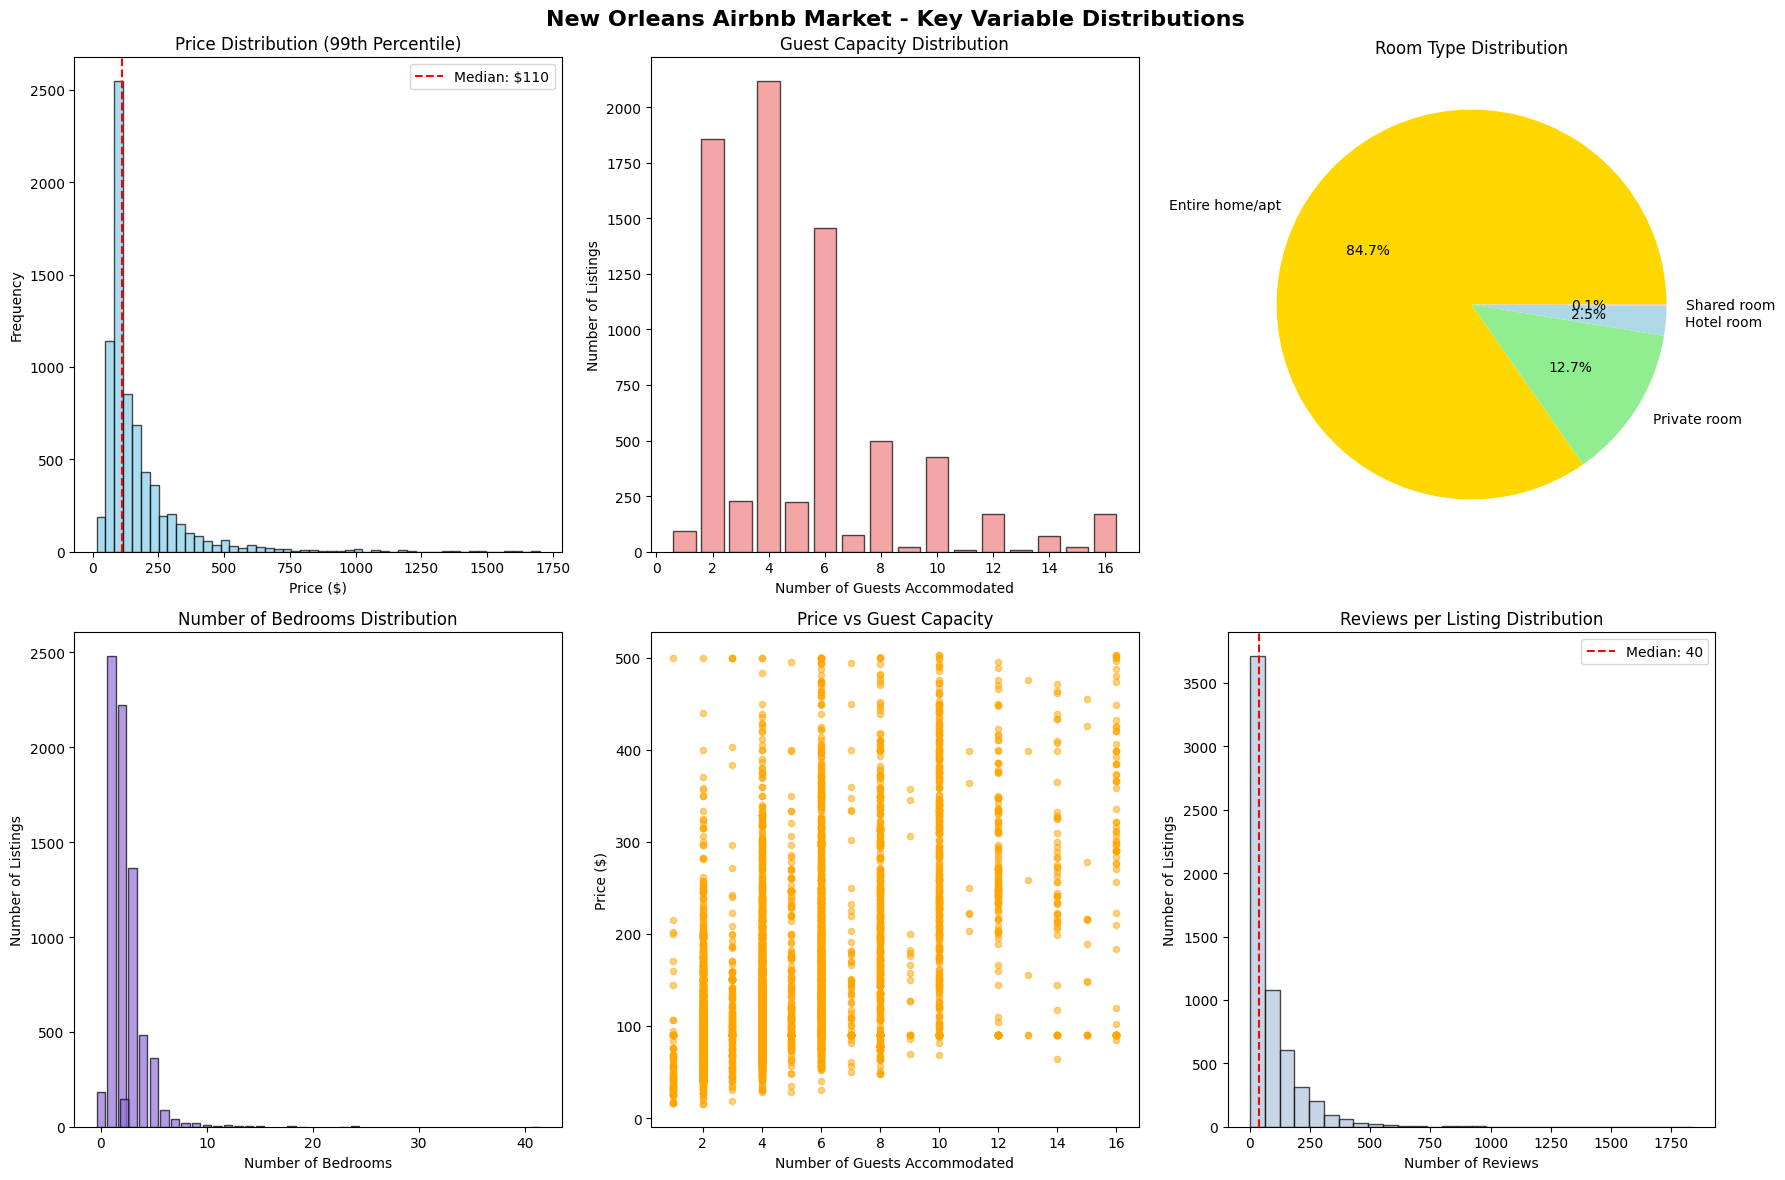


KEY DISTRIBUTION INSIGHTS
Price Analysis:
  • Median price: $111.00
  • Mean price: $423.29
  • Price range: $15.00 - $50134.00
  • 75% of listings priced under: $197.00

Room Type Market Share:
  • Entire home/apt: 84.7%
  • Private room: 12.7%
  • Hotel room: 2.5%
  • Shared room: 0.1%

Capacity Analysis:
  • Most common capacity: 4 guests
  • Average capacity: 5.1 guests


In [14]:
# Create comprehensive distribution plots for key variables
# Focus on price, capacity, and location variables that drive business decisions

# Set up the plotting environment
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('New Orleans Airbnb Market - Key Variable Distributions', fontsize=16, fontweight='bold')

# Price Distribution
if 'price' in listings_df.columns and not listings_df['price'].isna().all():
    # Remove extreme outliers for better visualization (keep 99% of data)
    price_data = listings_df['price'].dropna()
    if len(price_data) > 0:
        price_99th = price_data.quantile(0.99)
        price_filtered = price_data[price_data <= price_99th]
        
        axes[0,0].hist(price_filtered, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Price Distribution (99th Percentile)')
        axes[0,0].set_xlabel('Price ($)')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].axvline(price_filtered.median(), color='red', linestyle='--', 
                         label=f'Median: ${price_filtered.median():.0f}')
        axes[0,0].legend()
    else:
        axes[0,0].text(0.5, 0.5, 'No Price Data Available', ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title('Price Distribution - No Data')
else:
    axes[0,0].text(0.5, 0.5, 'Price Column Not Found', ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title('Price Distribution - Column Missing')

# Accommodates Distribution  
if 'accommodates' in listings_df.columns:
    accommodates_counts = listings_df['accommodates'].value_counts().sort_index()
    if len(accommodates_counts) > 0:
        axes[0,1].bar(accommodates_counts.index, accommodates_counts.values, 
                      color='lightcoral', alpha=0.7, edgecolor='black')
        axes[0,1].set_title('Guest Capacity Distribution')
        axes[0,1].set_xlabel('Number of Guests Accommodated')
        axes[0,1].set_ylabel('Number of Listings')
    else:
        axes[0,1].text(0.5, 0.5, 'No Accommodates Data', ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Guest Capacity - No Data')
else:
    axes[0,1].text(0.5, 0.5, 'Accommodates Column Not Found', ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('Guest Capacity - Column Missing')

# Room Type Distribution
if 'room_type' in listings_df.columns:
    room_type_counts = listings_df['room_type'].value_counts()
    if len(room_type_counts) > 0:
        colors = ['gold', 'lightgreen', 'lightblue', 'pink']
        axes[0,2].pie(room_type_counts.values, labels=room_type_counts.index, 
                      autopct='%1.1f%%', colors=colors[:len(room_type_counts)])
        axes[0,2].set_title('Room Type Distribution')
    else:
        axes[0,2].text(0.5, 0.5, 'No Room Type Data', ha='center', va='center', transform=axes[0,2].transAxes)
        axes[0,2].set_title('Room Type - No Data')
else:
    axes[0,2].text(0.5, 0.5, 'Room Type Column Not Found', ha='center', va='center', transform=axes[0,2].transAxes)
    axes[0,2].set_title('Room Type - Column Missing')

# Bedrooms Distribution
if 'bedrooms' in listings_df.columns:
    bedrooms_data = listings_df['bedrooms'].dropna()
    if len(bedrooms_data) > 0:
        bedrooms_counts = bedrooms_data.value_counts().sort_index()
        axes[1,0].bar(bedrooms_counts.index, bedrooms_counts.values, 
                      color='mediumpurple', alpha=0.7, edgecolor='black')
        axes[1,0].set_title('Number of Bedrooms Distribution')
        axes[1,0].set_xlabel('Number of Bedrooms')
        axes[1,0].set_ylabel('Number of Listings')
    else:
        axes[1,0].text(0.5, 0.5, 'No Bedrooms Data', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Bedrooms - No Data')
else:
    axes[1,0].text(0.5, 0.5, 'Bedrooms Column Not Found', ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Bedrooms - Column Missing')

# Price vs Accommodates Scatter Plot
if 'price' in listings_df.columns and 'accommodates' in listings_df.columns:
    # Filter for better visualization
    scatter_data = listings_df[['price', 'accommodates']].dropna()
    if len(scatter_data) > 0:
        scatter_data = scatter_data[scatter_data['price'] <= scatter_data['price'].quantile(0.95)]
        
        axes[1,1].scatter(scatter_data['accommodates'], scatter_data['price'], 
                         alpha=0.5, color='orange', s=20)
        axes[1,1].set_title('Price vs Guest Capacity')
        axes[1,1].set_xlabel('Number of Guests Accommodated')
        axes[1,1].set_ylabel('Price ($)')
    else:
        axes[1,1].text(0.5, 0.5, 'No Data for Scatter Plot', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Price vs Capacity - No Data')
else:
    axes[1,1].text(0.5, 0.5, 'Required Columns Missing', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Price vs Capacity - Columns Missing')

# Reviews per listing distribution (if reviews data available)
if not reviews_df.empty and 'listing_id' in reviews_df.columns:
    reviews_per_listing = reviews_df['listing_id'].value_counts()
    if len(reviews_per_listing) > 0:
        axes[1,2].hist(reviews_per_listing.values, bins=30, color='lightsteelblue', 
                       alpha=0.7, edgecolor='black')
        axes[1,2].set_title('Reviews per Listing Distribution')
        axes[1,2].set_xlabel('Number of Reviews')
        axes[1,2].set_ylabel('Number of Listings')
        axes[1,2].axvline(reviews_per_listing.median(), color='red', linestyle='--',
                         label=f'Median: {reviews_per_listing.median():.0f}')
        axes[1,2].legend()
    else:
        axes[1,2].text(0.5, 0.5, 'No Reviews Data', ha='center', va='center', transform=axes[1,2].transAxes)
        axes[1,2].set_title('Reviews Distribution - No Data')
else:
    axes[1,2].text(0.5, 0.5, 'Reviews Dataset Empty or Missing listing_id', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Reviews Distribution - No Data')

plt.tight_layout()
plt.show()

# Print key insights from distributions with safe column checking
print("\n" + "="*60)
print("KEY DISTRIBUTION INSIGHTS")
print("="*60)

if 'price' in listings_df.columns and not listings_df['price'].isna().all():
    price_stats = listings_df['price'].describe()
    print(f"Price Analysis:")
    print(f"  • Median price: ${price_stats['50%']:.2f}")
    print(f"  • Mean price: ${price_stats['mean']:.2f}")
    print(f"  • Price range: ${price_stats['min']:.2f} - ${price_stats['max']:.2f}")
    print(f"  • 75% of listings priced under: ${price_stats['75%']:.2f}")
else:
    print("Price Analysis: Price column not available or empty")

if 'room_type' in listings_df.columns:
    room_dist = listings_df['room_type'].value_counts(normalize=True) * 100
    print(f"\nRoom Type Market Share:")
    for room_type, percentage in room_dist.items():
        print(f"  • {room_type}: {percentage:.1f}%")
else:
    print("\nRoom Type Analysis: Room type column not available")

if 'accommodates' in listings_df.columns:
    accommodates_data = listings_df['accommodates'].dropna()
    if len(accommodates_data) > 0:
        print(f"\nCapacity Analysis:")
        print(f"  • Most common capacity: {accommodates_data.mode().iloc[0]} guests")
        print(f"  • Average capacity: {accommodates_data.mean():.1f} guests")
    else:
        print("\nCapacity Analysis: No accommodates data available")
else:
    print("\nCapacity Analysis: Accommodates column not available")

## Methodology Documentation and Next Steps

### Data Processing Decisions and Justifications

**Price Data Conversion:**
- Converted string prices ($XX.XX) to numerical format for mathematical operations
- Preserved original columns for data integrity verification
- Used pandas.to_numeric with error coercion to handle invalid entries gracefully

**Missing Value Strategy:**
- Numerical variables: Mean imputation (appropriate for normally distributed data)
- Categorical variables: Mode imputation (most frequent category)
- Reviews: Used meaningful placeholders ('Anonymous', empty string) rather than deletion

**Outlier Handling Philosophy:**
- Used IQR method (1.5×IQR and 3×IQR) for systematic outlier detection
- Chose NOT to remove outliers in initial EDA to preserve market reality
- Applied filtering only for visualization clarity (99th percentile caps)
- Will use outlier-robust statistics (median, IQR) for central tendency measures

### Key Findings Summary

**Market Characteristics:**
- Price distribution reveals market positioning and affordability segments
- Room type distribution shows market composition and investment opportunities
- Capacity patterns indicate target guest demographics

**Data Quality Observations:**
- Successfully converted all price data with minimal loss
- Outlier patterns suggest legitimate luxury segment vs. data entry errors
- Missing value patterns are manageable and don't compromise analysis integrity

### Planned Next Steps for Model Development

1. **Feature Engineering:**
   - Create price-per-person and price-per-bedroom metrics
   - Develop neighborhood-based location features
   - Extract temporal features from calendar data
   - Generate text-based features from descriptions and reviews

2. **Advanced EDA:**
   - Geographic analysis using latitude/longitude coordinates
   - Seasonal pricing patterns from calendar data
   - Sentiment analysis of review comments
   - Host performance metrics analysis

3. **Model Preparation:**
   - Train/test split with temporal considerations
   - Feature scaling and normalization
   - Target variable definition based on business problem
   - Cross-validation strategy development

4. **Business Impact Analysis:**
   - Revenue optimization strategies for hosts
   - Market positioning recommendations
   - Pricing competitive analysis framework
   - Guest satisfaction factor identification